In [51]:
#Runs a Crank Nicolson Scheme for a gaussian laser pulse propagating
#in a plasma channel and computes the result for one coordinate
#using the wave equation defined by "Tunable polarization plasma channel
#undulator for narrow bandwidth photon emission" Rykovanov et. al.
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python2.7/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['xlim', 'ylim', 'e']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [52]:
import numpy as np
from matplotlib import pyplot as plt
from ipywidgets import interact
import sys

In [53]:
#Sets path for saving data and number of significant
#figures stored in variables
sys.path.append("/home/data")
np.set_printoptions(precision=15)

In [54]:
#Define x where L is half the length of the channel, NSteps_x is the number
#of steps the channel is divided into, and dx is the constant distance
#between steps in the x direction used in finite difference method.
#x_grid is the vector used to store the width of the space.

L = 15
NSteps_x=201
#dx = float(L)/float(J-1)
#x_grid = np.array([j*dx for j in range(J)])

x_grid = linspace(-L, L, NSteps_x)
dx=x_grid[1]-x_grid[0]

#print x_grid.shape

In [55]:
#Define t where T is the full period of the simulation, NSteps_t is the
#number of divisions of the temporal variable, and dt is the separation of
#time steps used in finite difference method. t_grid is the vector that
#stores the temporal domain.


T = 2000
NSteps_t = 40001
#dt = float(T)/float(N-1)
#t_grid = np.array([n*dt for n in range(N)])

t_grid = linspace(0, T, NSteps_t)
dt=t_grid[1]-t_grid[0]

In [56]:
#Define parameters according to "Tunable polarization plasma channel
#undulator for narrow bandwidth photon emission" Rykovanov et. al. From these parameters,
#the density of the plasma is determined and stored in the inline function
#pot. thetax is the insertion angle of the pulse into the channel.

#i=1j
#Mp is the ratio of laser to plasma wave numbers
Mp=33.
#n0 is the on-axis plasma density.
n0=1.0e18
#e is the fundamental electron charge
e=4.8e-10
#me is the electron mass
me=9.11e-28
#c is the speed of light
c=2.99792458e10
#kp is the plasma frequency
kp=((4.*pi*(e**2.)*n0)/(me*c**2.))**0.5
#rm
rm=7*2*pi/Mp
#rcl
rcl=e**2/(me*c**2)
#Dn
Dn=kp**2/((rm**2)*rcl*pi)
#R
R=pow(rm,2)/(2)
#R=pow(rm,2)/(2*sqrt(2))
#R=pow(rm,2)/2
#Omega
Omega=pow(Mp*R,-1)




#Dn is the channel depth
#Dn=6.74**28
#Dn=2.1**17
#kp is the plasma wave number
#kp=np.sqrt((4*np.pi*pow(pow(1.602,-19),2)*n0)/(pow(9.109,-31)*pow(299792458,2)))
#kp=3.2561**8
#kl is the wave number of the laser
#kl=Mp*kp
#rcl is the classical electron radius
#rcl=pow(pow(1.602,-19),2)/(pow(9.109,-31)*pow(299792458,2))
#rcl=2.8179**-13
#rm is the matched laser spotsize
#rm=kp/np.sqrt(np.pi*rcl*Dn)
#rm=1.33279688334
#R is the dimensionless channel radius
#R=pow(rm,2)/2
#Omega is the eigenfrequency of potential oscillation
#Omega=pow(Mp*R,-1)
a0=1.
w0=1.5*rm
thetax=0.
x0=1.

#sigma is composed of the constants present in the differential equation
#which describes propagation in the plasma channel. 
sigma=1j*dt/(4*Mp*pow(dx,2))

#V is the full potential term of the Schroedinger's equation used to propagate
#the laser pulse in the plasma channel.

V=(Mp/4)*((1/pow(Mp,2))+(pow(x_grid,2)*pow(Omega,2)))
#V[970:1000]=0.03
#V[0:30]=0.03

#a is introduced as the laser's vector potential which the differential equation
#acts on.

pot=lambda j: (1j*Mp*dt/4)*((1/pow(Mp,2))+(pow(j,2)*pow(Omega,2)))

#pot_vec=lambda x_grid, a: np.multiply(1j, Mp, 0.5, dt, np.add(np.multiply(1,pow(pow(Mp,2),-1)),np.multiply(pow(x_grid,2),pow(Omega,2))),a) 
            

print w0


1.99919532501


In [57]:
#Specify initial conditions of the laser's vector potential. The pulse function
#is taken from "Tunable polarization plasma channel
#undulator for narrow bandwidth photon emission" Rykovanov et. al.
#as a guassian pulse with an oscillatory
#term that yeilds oscillation for some input angle.

no_high=10


def afunc(x_grid):
    #print thetax
    return a0*np.exp(-((x_grid-x0)**2)/(w0**2)+1j*Mp*thetax*x_grid)

(201,) (201,)


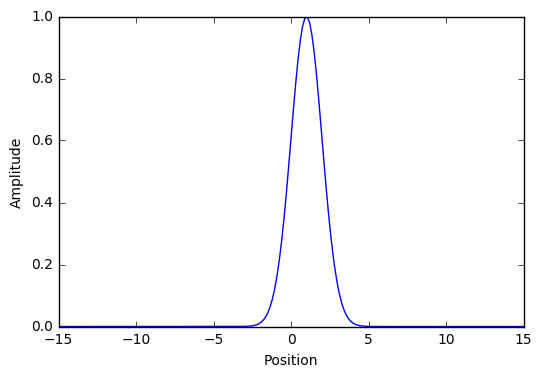

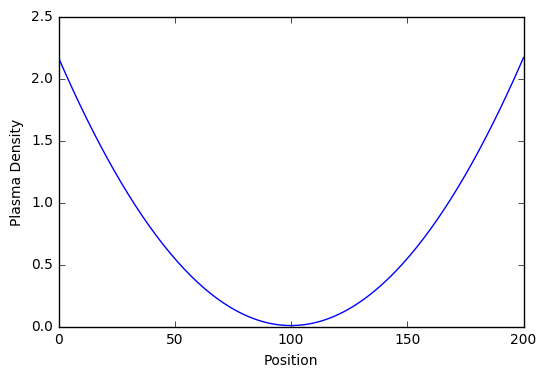

In [58]:
#Plots the initial field's intensity and potential
#for visual representation.
a = np.zeros(NSteps_x)

#a = np.array([afunc(X) for X in x_grid[0:NSteps_x]])
a = afunc(x_grid)
#a=list(a)
#a= [0] + a + [0]
#a=array(a)
a=np.transpose(a)

print a.shape, x_grid.shape

ylim=((0., 1))
plt.xlabel('Position')
plt.ylabel('Amplitude')
plt.plot(x_grid,a*a.conjugate())
plt.show()

ylim=((0., 1))
plt.xlabel('Position')
plt.ylabel('Plasma Density')
plt.plot(V)
plt.show()


In [59]:
#Define matrices for the Crank-Nicolson scheme. These are defined by finite
#difference method for x and t where A acts on the field at the next time step
#and B acts on the field in the previous timestep. These matrices are tridiagonal
#for problems in 1D.

A=np.diagflat([-sigma for m in range(NSteps_x-1) ], -1) +\
np.diagflat([1.+2.*sigma+pot(x_grid[m]) for m in range(NSteps_x)]) +\
np.diagflat([-sigma for m in range(NSteps_x-1)], 1)

B=np.diagflat([sigma for m in range(NSteps_x-1)], -1) +\
np.diagflat([[1.-2.*sigma-pot(x_grid[m]) for m in range(NSteps_x)]]) +\
np.diagflat([sigma for m in range (NSteps_x-1)], 1)

#For conductive boundaries, the values of the derivatives at the endpoints of
#the matrix demand that the field is zero and remains zero. The A and B matrices
#can no longer be tridiagonal as the endpoints no longer change in the same way 
#as the rest of the field. The first and last values are 1 so the matrices remain
#invertible.

A[0][0]=1.
A[0][1]=0.
A[1][0]=0.
A[-2][-1]=0.
A[-1][-1]=1.
A[-1][-2]=0.
B[0][0]=1.
B[0][1]=0.
B[1][0]=0.
B[-2][-1]=0.
B[-1][-1]=1.
B[-1][-2]=0.

#Checks to see if A and B are invertible. This is required for the solving scheme
#and the matrices may not be invertible for particular sets of initial conditons.

Aisinv=np.linalg.inv(A)
Bisinv=np.linalg.inv(B)

#A.shape
#B.shape


In [60]:
#Contains a loop which advances the field in time with each iteration. 
#The previous field is a where the first field inserted into the channel.
#The next time step is calculated through a linear algebra solving function
#and stored in a_new which is recast as a and arranged into a vector through
#a_record.

a_record=[]

a_record.append(a)

plotnumber=1

intensity=zeros(NSteps_x)

energyval=zeros(NSteps_t)

centpos=zeros(NSteps_t)

width1=0
width2=0
width=zeros(NSteps_t)

#for ti in range(1,2):
for ti, t in enumerate(t_grid):
    a_new = np.linalg.solve(A,B.dot(a) )
    
    a = a_new
    
    a_record.append(a)
    
    #Intensity, being the measurable quantity in optics, is calculated
    #and plotted here. The plots are saved so they can be converted into
    #a gif for visualization of the time advancement.
    
    intensity=a*a.conjugate()
    #intensityflip=np.flip(intensity,0)
    
    #plt.xlabel('Position'); plt.ylabel('Intensity')
    #fig1=plt.plot(x_grid,intensity)
    #plt.ylim=([0,1])
    #filename= 'cranknicktest-%06d.png' % ti
    #savefig('/home/teter/data/conductive2/'+filename,dpi=100)
    #plt.clf()
    #plt.cla()
    #plt.close()
    
    #In order to compare with the paper "Efficient Modeling of Laser-Plasma
    #Accelerators Using the Ponderomotive-Based Code INF&RNO" by C. Benedetti
    #et. al., the total intensity is saved in the array energyval.
    
    energyval[ti]=sum(intensity)
    
    peaki=np.amax(intensity)
    
    for pos in range(0,NSteps_x-1):
        if intensity[pos] == peaki:
            centpos[ti] = x_grid[pos]
    
    for pos2 in range(0,NSteps_x-1):
        if intensity[pos2] >= 1/(exp(2)):
            width1 = x_grid[pos2]
            break
        if intensity[-pos2] >= 1/(exp(2)):
            width2 = x_grid[-pos2]
            break

    width[ti]=(width2-width1)
    
    if ti==0:
        data_a = intensity
    else:
        data_a = vstack([data_a, intensity])
    
    #plt.show()
    #if ti % 5 == 0:
    #    ylim=((0., 1))
    #    plt.xlabel('Position'); plt.ylabel('Field')
    #    plt.plot(x_grid,a)
        #plt.plot(x_grid,a*a.conjugate())
    #    plt.plot(x_grid,intensity)
    #    plt.show()
    #    print plotnumber
    #    plotnumber=plotnumber+1

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:51: ComplexWarning: Casting complex values to real discards the imaginary part


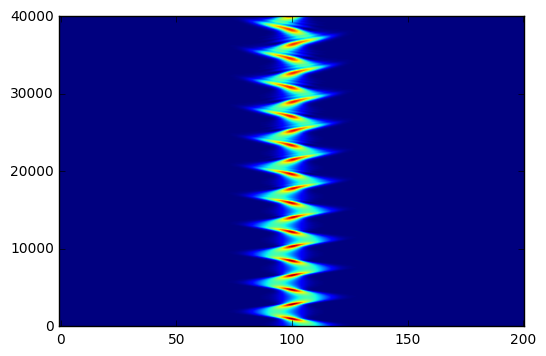

In [61]:
imshow(abs(data_a), aspect='auto', origin='lower')

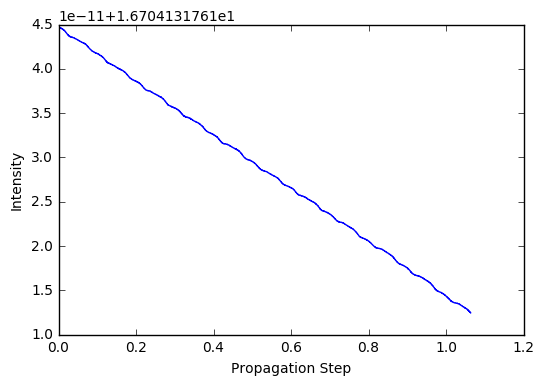

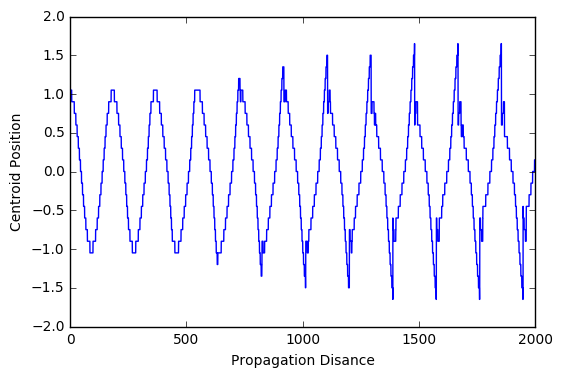

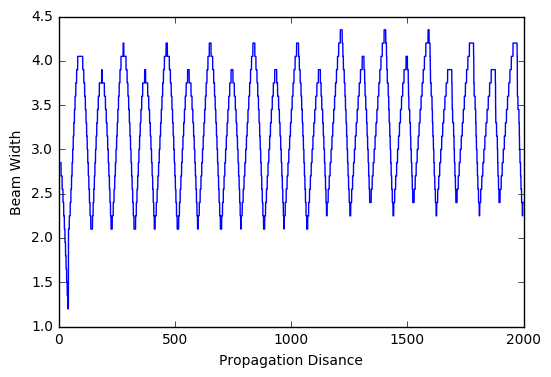

In [62]:
z_grid=t_grid/kp
ylim=((0., 1))
plt.xlabel('Propagation Step')
plt.ylabel('Intensity')
plt.plot(z_grid,energyval)
plt.show()


ylim=((0., 1))
plt.xlabel('Propagation Disance'); plt.ylabel('Centroid Position')
plt.plot(t_grid,centpos)
plt.show()

ylim=((0., 1))
plt.xlabel('Propagation Disance'); plt.ylabel('Beam Width')
plt.plot(t_grid,width)
plt.show()

In [63]:
print(sys.version)

2.7.12 (default, Nov 19 2016, 06:48:10) 
[GCC 5.4.0 20160609]


In [64]:
wtest=(33/(2*pi))*sqrt(2.25*0.5*rm**2+(rm**2)/4.5+(2.25*0.5*rm**2-rm**2/4.5)*cos(2*Omega*t_grid))


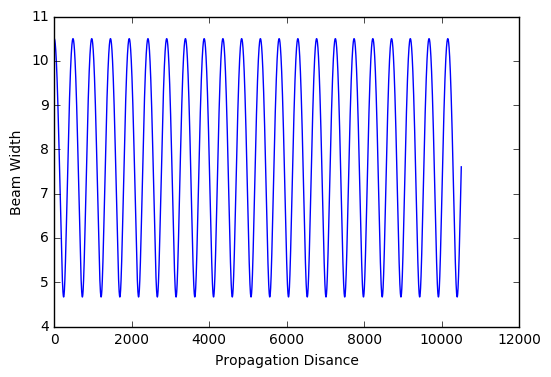

In [65]:
ylim=((0., 1))
plt.xlabel('Propagation Disance'); plt.ylabel('Beam Width')
plt.plot(t_grid*33/(2*pi),wtest)
plt.show()

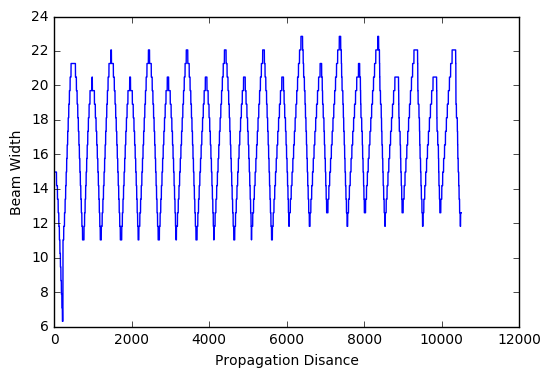

In [67]:
wigwidth=width*33/(2*pi)
ylim=((0., 1))
plt.xlabel('Propagation Disance'); plt.ylabel('Beam Width')
plt.plot(t_grid*33/(2*pi),wigwidth)
plt.show()